# Heuristic Optimization Project 

1. Read a280.tsp

In [18]:
import os 
import random
import numpy as np
from collections import deque
from core.evaluation import evaluate


fdir = './problems'
fname = 'a280.tsp'
fpath = os.path.join(fdir, fname)
config=dict()
POOL = 100   # Generation Pool Size
TSIZE = 20   # Tournament Size
crossover_rate = 0.25
mutation_rate = 0.2

# open tsp file and then factorize the information into data that are useful
with open(fpath, 'r') as f:
    NAME = f.readline().split()[-1]
    COMMENT = ' '.join(f.readline().split()[2:])
    FTYPE = f.readline().split()[-1]
    DIMENSION = int(f.readline().split()[-1])
    EDGE_WEIGHT_TYPE = f.readline().split()[-1]
    f.readline()
    infos = f.readlines()[:-1]

infos = [info.split() for info in infos]
tsp_data = dict()
# get coordinate
for (node, x, y) in infos:
    tsp_data[node] = [int(x), int(y)]

xs = [d[0] for d in list(tsp_data.values())]
ys = [d[1] for d in list(tsp_data.values())]


config = dict()
config['DIMENSION'] = DIMENSION
config['POOL'] = POOL
config['TSIZE'] = TSIZE


# initial solution 
sol = list(range(1, DIMENSION+1))
random.shuffle(sol)




In [19]:
def sol_to_coeff(solution, tsp_data):
    """
    Gets the solution (number of node) and returns the (x, y) coefficient
    which is capable of plotting / evaluating
    """
    x_sol = [0] * DIMENSION
    y_sol = [0] * DIMENSION
    for i, node in enumerate(solution):
        [x_sol[i], y_sol[i]] = tsp_data[f'{node}']
    return (x_sol, y_sol)

# Tournament selection
def tournament(sols:list,
               config:dict):

    evals = [0] * config['POOL']
    
    for i, sol in enumerate(sols):
        x_sol, y_sol = sol_to_coeff(solution=sol, tsp_data=tsp_data)
        evals[i] = evaluate(x_sol, y_sol)

    new_gen_idx = [evals.index(min(random.sample(evals, config['TSIZE']))) 
                        for _ in range(config['POOL'])]
    # print(new_gen_idx)
    next_gen_sols = [sols[idx] for idx in new_gen_idx]
    return next_gen_sols

# cyclic crossover 
def crossover(sols:list, crate=0.25):
    crossover_rate = 0.25 
    parents = []
    parents_idx = [] 

    for i in range(len(sols)):
        if random.random() < crossover_rate:
            parents.append(sols[i])
            parents_idx.append(i)

    for i, idx in enumerate(parents_idx):
        sols.pop(idx-i)

    if len(parents) % 2 == 1:
        parents.append(sols[random.randint(0, len(sols)-1)])
        parents_idx.append(sols.pop(random.randint(0, len(sols)-1)))

    for i in range(len(parents) // 2):
        o1, o2 = cyclic_crossover(p1=parents[2*i], p2=parents[2*i + 1])
        sols += [o1, o2]

    return sols 

def cyclic_crossover(p1:list, p2:list):
    o1 = p1.copy()
    o2 = p2.copy() 
    idx = 0 
    swap_index = [0]
    while True:
        idx = p1.index(p2[idx])
        if idx in swap_index:
            break
        swap_index.append(idx)
    for idx in swap_index:
        o1[idx] = p2[idx]
        o2[idx] = p1[idx]
    # print(len(swap_index))
    return o1, o2

# Mutation
def mutate(sols : list,
           mut_rate=0.2): 
    for i, sol in enumerate(sols):
        if random.random() < mut_rate:
            sols[i] = displacement(sol)
    return sols 

def pick_random_idx(sol:list):
    idx1 = random.randint(0, len(sol)-1)
    idx2 = random.randint(0, len(sol)-1)
    return idx1, idx2

def displacement(sol:list):

    idx_selection = sorted(pick_random_idx(sol))
    inserted_sol_fragment = sol[idx_selection[0]:idx_selection[1]]

    sol_tmp = [elem for elem in sol if elem not in inserted_sol_fragment]
    idx_selection = random.randint(0, len(sol_tmp)-1)

    for i in range(len(inserted_sol_fragment)):
        sol_tmp.insert(i+idx_selection, inserted_sol_fragment[i])

    sol = sol_tmp 
    return sol 

def print_evals(solution : list, end='\n'):
    evaluations = [0] * POOL
    for i, sol in enumerate(solution):
        x_sol, y_sol = sol_to_coeff(solution=sol, tsp_data=tsp_data)
        evaluations[i] = evaluate(x_sol, y_sol)
    print(evaluations, end=end)

def print_evals_min(solution : list, end='\n'):
    evaluations = [0] * POOL
    for i, sol in enumerate(solution):
        x_sol, y_sol = sol_to_coeff(solution=sol, tsp_data=tsp_data)
        evaluations[i] = evaluate(x_sol, y_sol)
    print(min(evaluations), end=end)
    
def print_evals_avg(solution : list, end='\n'):
    evaluations = [0] * POOL 
    for i, sol in enumerate(solution):
        x_sol, y_sol = sol_to_coeff(solution=sol, tsp_data=tsp_data)
        evaluations[i] = evaluate(x_sol, y_sol)
    avg = sum(evaluations) / len(evaluations)
    print(avg, end=end)
    



2. Initialize Solutions

In [20]:
# Generation POOL = 10

sols = [list(range(1, DIMENSION+1)) for _ in range(POOL)]
evals = [0] * POOL

for i, sol in enumerate(sols):
    random.shuffle(sol)
    x_sol, y_sol = sol_to_coeff(solution=sol, tsp_data=tsp_data)
    # Evaluation of the solution (Euclidean distance)
    evals[i] = evaluate(x_sol, y_sol)

print(evals)
best_sol = sols[np.argmin(evals)]

[32272.07320245993, 34672.60010225242, 34968.804303498546, 34892.21368420808, 33663.8752943694, 33584.58451407598, 34193.19969406963, 36066.98495470744, 32990.98171302646, 34237.7019708211, 34921.008440005244, 33093.594396613946, 33664.48110709078, 32289.064340894714, 33051.24322960398, 34024.949971786176, 33228.48952089415, 33133.08297598276, 35844.48478065232, 32581.30067546957, 35094.12692541733, 34372.370551038766, 33851.2688668709, 34995.46042112499, 32636.417798262893, 32677.10912476957, 35527.10726245804, 36007.52423015583, 34638.48460793784, 34181.508993653646, 35240.63639978494, 32949.57317204872, 33385.50489467693, 32514.29370774812, 35554.568486626566, 33771.13108081007, 33070.93727388121, 33630.41435247482, 34354.22195459937, 36553.34742819637, 34120.81772727528, 34758.57860887969, 32443.09142727524, 34686.35571464993, 34523.29502623748, 36163.21496028717, 33680.002892951525, 33841.29610023067, 32707.28214999973, 33749.19698303615, 32769.94987939599, 33918.953881326306, 345

In [23]:
# main loop
for i in range(5000):
    sols = tournament(sols, config)
    sols = crossover(sols, crate=crossover_rate)
    sols = mutate(sols, mut_rate=mutation_rate)
print_evals(sols)
print_evals_min(sols)


[6045.748597899446, 5640.933179432934, 5640.933179432934, 5640.933179432934, 5830.239040494748, 5640.933179432934, 5640.933179432934, 5640.933179432934, 5640.933179432934, 5640.933179432934, 5943.451206204585, 5640.933179432934, 5640.933179432934, 5640.933179432934, 5640.933179432934, 5640.933179432934, 5931.379581720501, 5640.933179432934, 6100.293788266121, 5640.933179432934, 5640.933179432934, 6079.200059871642, 6079.631470617813, 5640.933179432934, 5965.87597616011, 5864.639501907164, 5640.933179432934, 5640.933179432934, 5640.933179432934, 5640.933179432934, 5640.933179432934, 5640.933179432934, 5640.933179432934, 5640.933179432934, 5640.933179432934, 5640.933179432934, 5640.933179432934, 5640.933179432934, 6105.674705167483, 5640.933179432934, 5640.933179432934, 6020.209223777258, 5640.933179432934, 5640.933179432934, 5640.933179432934, 5640.933179432934, 5640.933179432934, 5640.933179432934, 5640.933179432934, 5640.933179432934, 5640.933179432934, 6019.350370684211, 5640.9331794

In [24]:
print_evals_avg(sols)
for i, sol in enumerate(sols):
    x_sol, y_sol = sol_to_coeff(solution=sol, tsp_data=tsp_data)
    # Evaluation of the solution (Euclidean distance)
    evals[i] = evaluate(x_sol, y_sol)

5705.505546338595


In [25]:
x_sol, y_sol = sol_to_coeff(solution=sols[evals.index(min(evals))], tsp_data=tsp_data)

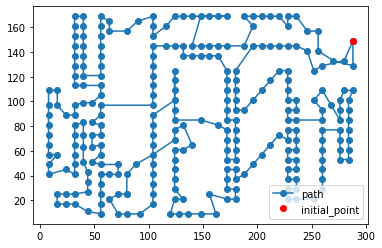

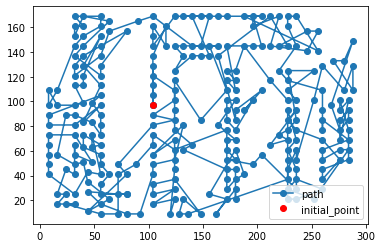

In [26]:
# Plot path of current solution 

import matplotlib.pyplot as plt 
def plot_result():
    plt.figure(1) 
    plt.plot(xs + [xs[0]], ys+ [ys[0]], '-o', label='path')
    plt.plot(xs[0], ys[0], 'ro', label='initial_point')
    plt.legend()

    plt.figure(2)
    plt.plot(x_sol + [x_sol[0]], y_sol + [y_sol[0]], '-o', label='path')
    plt.plot(x_sol[0], y_sol[0], 'ro', label='initial_point')
    plt.legend()
    plt.show()

plot_result()


In [37]:
p1, p2 = sols[:2]


### Cyclic Crossover (Success!)

In [41]:
# cyclic crossover 

def cyclic_crossover(p1:list, p2:list):
    o1 = p1.copy()
    o2 = p2.copy() 
    idx = 0 
    swap_index = [0]
    while True:
        idx = p1.index(p2[idx])
        if idx in swap_index:
            break
        swap_index.append(idx)
    for idx in swap_index:
        o1[idx] = p2[idx]
        o2[idx] = p1[idx]
    print(len(swap_index))
    return o1, o2

### Edge recombination Crossover (Failed)

In [28]:

edge_map = dict() 
for i, key in enumerate(p1):
    if i+1 < len(p1):
        edge_map[key] = [p1[i-1], p1[i+1]]
    else: 
        edge_map[key] = [p1[0], p1[i-1]]

for i, key in enumerate(p2):
    if i+1 < len(p1):
        edge_map[key]+=[p2[i-1], p2[i+1]]
        edge_map[key] = list(set(edge_map[key]))
    else:
        edge_map[key]+=[p2[0], p2[i-1]]
        edge_map[key] = list(set(edge_map[key]))
edge_map = dict(sorted(edge_map.items()))
edge_map


{1: [280, 88, 100, 158],
 2: [125, 100, 181, 254],
 3: [24, 161, 196, 254],
 4: [144, 225, 13, 165],
 5: [264, 201, 252, 142],
 6: [245, 226, 173, 38],
 7: [253, 108, 117, 238],
 8: [221, 73, 235, 245],
 9: [240, 164, 147, 236],
 10: [123, 83, 68, 143],
 11: [248, 183, 220, 63],
 12: [16, 169, 58, 242],
 13: [112, 99, 4, 213],
 14: [224, 54, 142, 135],
 15: [128, 45, 245, 200],
 16: [265, 12, 230, 87],
 17: [96, 233, 83, 195],
 18: [216, 251, 87, 223],
 19: [168, 83, 150, 22],
 20: [200, 203, 276, 103],
 21: [25, 212, 225, 63],
 22: [19, 51, 45, 195],
 23: [115, 260, 174, 175],
 24: [3, 33, 42, 91],
 25: [94, 261, 21, 38],
 26: [235, 92, 29, 165],
 27: [225, 66, 201, 221],
 28: [113, 74, 251, 158],
 29: [26, 85, 222, 30],
 30: [184, 29, 123, 37],
 31: [152, 201, 114, 136],
 32: [208, 186, 250, 172],
 33: [24, 271, 141, 263],
 34: [168, 216, 144, 239],
 35: [80, 242, 67, 198],
 36: [241, 156, 101, 76],
 37: [90, 172, 101, 30],
 38: [25, 154, 6, 215],
 39: [104, 209, 196, 158],
 40: [194

In [29]:
def pop_node():
    try:
        edge_map.pop(o1[-1])
    except:
        end = True
    for key, value in edge_map.items():
        try:
            value.remove(o1[-1])
        except:
            pass


# starting from 67 
o1 = [p1[0]]
end = False 

for i in range(len(p1)):
    curr_node = o1[-1]
    
    next_node = np.argmin([len(edge_map[i]) for i in edge_map[curr_node]])
    next_node = edge_map[curr_node][next_node]
    pop_node()
    o1.append(next_node)
    if end:
        break
    
    




ValueError: attempt to get argmin of an empty sequence

In [30]:
print(o1)
print(len(o1))
edge_map

[196, 128, 75, 174, 176, 66, 232, 120, 56, 242, 121, 185, 74, 274, 129, 210, 134, 122, 228, 124, 171, 140, 130, 241, 51, 180, 167, 88, 145, 266, 93, 168, 34, 216, 18, 251, 28, 113, 61, 53, 184, 195, 22, 19, 150, 87, 16, 12, 169, 279, 179, 109, 186, 32, 208, 133, 96, 17, 83, 10, 143, 132, 41, 70, 119, 68, 197, 110, 115, 267, 81, 106, 220, 273, 97, 142, 230, 191, 188, 126, 99, 43, 158, 1, 280, 79, 203, 20, 276, 103, 65, 262, 160, 159, 89, 272, 123, 30, 29, 222, 231, 161, 3, 24, 33, 271, 86, 57, 80, 50, 48, 202, 102, 78, 138, 151, 156, 263, 265, 215, 62, 90, 37, 172, 100, 45, 233, 261, 136, 127, 59, 69, 205, 166, 243, 112, 13, 213, 76, 36, 101, 67, 35, 198, 157, 223, 49, 58, 199, 155, 258, 277, 63, 11, 183, 193, 92, 170, 275, 219, 177, 44, 137, 268, 249, 105, 278, 190, 246, 204, 94, 25, 21, 212, 71, 91, 149, 154, 38, 6, 226, 248, 217, 255, 116, 131, 72, 238, 237, 214, 162, 153, 247, 211, 95, 252, 5, 264, 270, 77, 257, 125, 201, 27, 225, 147, 182, 46, 40, 194, 152, 31, 114, 207, 256, 107, 

{2: [181, 254],
 7: [108, 117],
 14: [224, 54, 135],
 23: [260, 175],
 54: [14],
 55: [187, 234, 269],
 60: [148, 135],
 85: [139, 260],
 98: [192, 178, 187],
 108: [7, 111],
 111: [108, 269],
 117: [218, 7],
 135: [218, 60, 14],
 139: [148, 85],
 148: [139, 254, 60],
 163: [250, 173, 175],
 173: [224, 163],
 175: [163, 23],
 178: [218, 98],
 181: [250, 2, 218],
 187: [98, 55],
 189: [],
 192: [98],
 218: [135, 178, 117, 181],
 224: [173, 14],
 227: [234],
 234: [227, 55],
 250: [163, 181],
 254: [2, 148],
 260: [85, 23],
 269: [111, 55]}

In [ ]:
a = [1, 2, 3, 4]
try:
    a.remove(5)
except:
    pass

a

[1, 2, 3, 4]

In [ ]:
def pop_node():
    for value in edge_map.values():
        try:
            value.remove(o1[-1])
        except:
            pass
edge_map

{1: [143, 210, 212, 55],
 2: [74, 19, 147, 134],
 3: [275, 261, 174, 215],
 4: [88, 275, 196, 261],
 5: [257, 226, 277, 6],
 6: [50, 139, 5, 143],
 7: [209, 42, 147, 238],
 8: [49, 210, 203, 207],
 9: [186, 153, 145, 198],
 10: [179, 125, 15],
 11: [183, 66, 251, 55],
 12: [136, 227, 156, 237],
 13: [162, 237, 158, 103],
 14: [42, 83, 69, 149],
 15: [10, 123, 61, 182],
 16: [152, 105, 187, 270],
 17: [211, 220, 157, 55],
 18: [98, 163, 77, 133],
 19: [2, 164, 78, 154],
 20: [58, 59, 174, 263],
 21: [241, 226, 118, 207],
 22: [144, 138, 163, 221],
 23: [194, 259, 219, 95],
 24: [275, 57, 43, 188],
 25: [234, 188, 214, 278],
 26: [184, 83, 100, 119],
 27: [184, 274, 173, 71],
 28: [80, 235, 268, 211],
 29: [88, 273, 51, 53],
 30: [81, 65, 242, 190],
 31: [176, 32, 195, 82],
 32: [131, 116, 85, 31],
 33: [90, 267, 212, 127],
 34: [114, 131, 245, 46],
 35: [160, 253, 109, 189],
 36: [80, 218, 228, 237],
 37: [136, 170, 100, 181],
 38: [249, 178, 165, 78],
 39: [208, 105, 67, 51],
 40: [144

In [38]:
p1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
p2 = [3, 6, 7, 8, 4, 1, 9, 5, 2]

edge_map = dict() 
for i, key in enumerate(p1):
    if i+1 < len(p1):
        edge_map[key] = [p1[i-1], p1[i+1]]
    else: 
        edge_map[key] = [p1[0], p1[i-1]]

for i, key in enumerate(p2):
    if i+1 < len(p1):
        edge_map[key]+=[p2[i-1], p2[i+1]]
        edge_map[key] = list(set(edge_map[key]))
    else:
        edge_map[key]+=[p2[0], p2[i-1]]
        edge_map[key] = list(set(edge_map[key]))
edge_map = dict(sorted(edge_map.items()))
edge_map

{1: [9, 2, 4],
 2: [1, 3, 5],
 3: [2, 4, 6],
 4: [8, 1, 3, 5],
 5: [9, 2, 4, 6],
 6: [3, 5, 7],
 7: [8, 6],
 8: [9, 4, 7],
 9: [8, 1, 5]}

In [38]:
def insertion_mutation(sol):
    curr_sol = sol.copy()
    next_sol = sol.copy()
    return next_sol 


In [62]:
def pick_random_idx(sol:list):
    idx1 = random.randint(0, len(sol)-1)
    idx2 = random.randint(0, len(sol)-1)
    return idx1, idx2

def displacement(sol:list):

    idx_selection = sorted(pick_random_idx(sol))
    inserted_sol_fragment = sol[idx_selection[0]:idx_selection[1]]

    sol_tmp = [elem for elem in sol if elem not in inserted_sol_fragment]
    idx_selection = random.randint(0, len(sol_tmp)-1)

    for i in range(len(inserted_sol_fragment)):
        sol_tmp.insert(i+idx_selection, inserted_sol_fragment[i])

    sol = sol_tmp 
    return sol 




In [69]:

# Mutation
def mutate(sols : list,
           mut_rate=0.2): 
    for i, sol in enumerate(sols):
        if random.random() < mut_rate:
            sols[i] = displacement(sol)
    return sols 


sols = mutate(sols=sols)
print_evals(sols)
print_evals_min(sols) 
    


[34033.11249675919, 34227.169933706115, 34033.11249675919, 34033.11249675919, 33964.099461706006, 34075.76061104332, 34099.922271646545, 34033.11249675919, 34140.945268565556, 34033.11249675919, 34033.11249675919, 34050.6656404192, 34229.82781270915, 33965.28326929638, 34033.11249675919, 34017.38225536199, 34033.11249675919, 34033.11249675919, 34033.11249675919, 34034.3919614637, 34033.11249675919, 34033.11249675919, 34077.86955455603, 34006.847123528794, 34033.11249675919, 34170.824168120416, 34201.990375133406, 34033.11249675919, 33924.27134122225, 34033.11249675919, 34358.264237803865, 33876.90921116488, 34033.11249675919, 34033.11249675919, 34103.56166023125, 34033.11249675919, 34051.03297869624, 34033.11249675919, 34073.10620256842, 34033.11249675919, 33769.50229018966, 34033.11249675919, 34114.69069221434, 33813.656128911374, 34033.11249675919, 34005.06980145769, 34033.11249675919, 34033.11249675919, 34033.11249675919, 33846.66170680623, 34033.11249675919, 34033.11249675919, 3411